In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import gc
import fitsio 
import numpy as np
import matplotlib as mpl
from utils_shear_ana import catutil
from utils_shear_ana import pltutil
import astropy.table as astTab
label_size = 8
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20

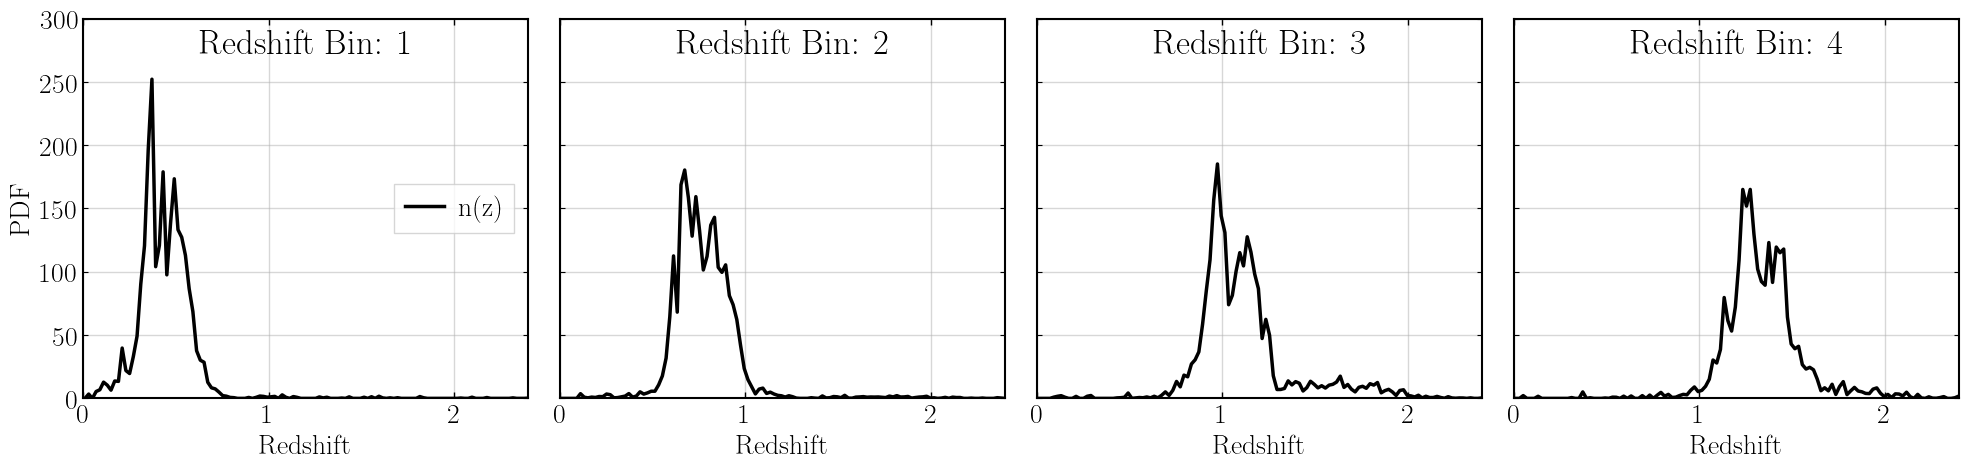

In [14]:
plt.close()
fig,axes=pltutil.make_figure_axes(ny=1,nx=4)
for izbin in range(4):
    ax=axes[izbin]
    #ax.set_yscale('log')
    ax.set_xlim(0.,2.4)
    ax.set_ylim(0,300)
    ax.set_title('Redshift Bin: %d' %(izbin+1), y=1.0, pad=-25, fontsize=25)
    ax.set_xlabel('Redshift',fontsize=20)
    ax.set_xticks([0,1,2])
    ax.grid()
    if izbin!=0:
        ax.set_yticklabels([])
    else:
        ax.set_ylabel('PDF',fontsize=20)

    fname= '../nz_source_y1.fits'
    dd=fitsio.read(fname)
    dz=dd['Z_MID'][1]-dd['Z_MID'][0]
    ax.plot(dd['Z_MID'],dd['BIN%d' %(izbin+1)]/dz,color='black',label='n(z)',ls='-',linewidth=2.5)
    
    if izbin==0:
        leg=ax.legend(handlelength=1.4, handletextpad=0.5, fancybox=False,fontsize=20,loc='center right')
        for ii,tt in enumerate(leg.texts):
            tt.set_color(pltutil.colors0[ii])
    
    
plt.tight_layout()